**What is Feature Engineering?**

            Feature engineering is the process of creating new features or modifying existing ones to improve the performance of machine learning models. It involves techniques like feature extraction, transformation, encoding, and scaling to make data more useful for predictions.


**Why Do We Need Feature Engineering?**

1.**Improves Model Performance** – Good features help models make better predictions.

2.**Reduces Overfitting** – Helps eliminate noise and irrelevant data.

3.**Handles Missing Data** – Creates meaningful replacements for missing values.

4.**Enables Better Interpretability** – Makes features more understandable and useful.
5.**Reduces Dimensionality** – Helps remove unnecessary data points, making the model efficient.
has context menu

In [ ]:
#step1:Extrxt Date and Time Features
import pandas as pd

#sample dataset
df=pd.DataFrame({'TransactionDate':pd.to_datetime(['2025-02-05 14:30:00','2025-02-06 18:45:00'])})

#Extract Date related Features
df['DayOfWeek']=df['TransactionDate'].dt.dayofweek
df['Hour']=df['TransactionDate'].dt.hour
df['IsWeekend']=df['DayOfWeek'].apply(lambda x:1 if x>5 else 0)
print (df)

#Why? Helps capure behaviorial trends(e.g shopping habits on weekends vs.weekdays)

      TransactionDate  DayOfWeek  Hour  IsWeekend
0 2025-02-05 14:30:00          2    14          0
1 2025-02-06 18:45:00          3    18          0


In [ ]:
#Aggregated Features
#Find average transaction amount per user:
df_transactions=pd.DataFrame({
    'UserID':[101,102,101,103,102],
    'TransactionAmount':[500,300,700,1000,400]
})

df_user_avg=df_transactions.groupby('UserID')['TransactionAmount'].mean().reset_index()
df_user_avg.rename(columns={'TransactionAmount':'AvgTransactionAmount'},inplace=True)
df_user_avg

,UserID,AvgTransactionAmount
0,101,600.0
1,102,350.0
2,103,1000.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.DataFrame({'ProductCategory': ['Electronics', 'Clothing', 'Grocery']})

# Initialize the OneHotEncoder with the correct argument
encoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to the ProductCategory column
encoded_features = encoder.fit_transform(df[['ProductCategory']])

# Create a new DataFrame with the encoded features
df_encoded_features = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

df_encoded_features


,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Grocery
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0


In [ ]:
#Log Transformation for Skewed data
#tRANSactionAmount has outliers apply log transformation
import numpy as np
df=pd.DataFrame({'TransactionAmount':[100,200,50000,10000,20000]})
df['LogTransactionAmount']=np.log1p(df['TransactionAmount'])
print(df)
#Why?reduces skewens and impact of outliers

   TransactionAmount  LogTransactionAmount
0                100              4.615121
1                200              5.303305
2              50000             10.819798
3              10000              9.210440
4              20000              9.903538


In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
df['NormalizedTransactionAmount']=scaler.fit_transform(df[['TransactionAmount']])

standard_scaler=StandardScaler()
df['StandardTransactionAmount']=standard_scaler.fit_transform(df[['TransactionAmount']])
df
#Why?Ensure all features have same scale preventing bias in Ml models

,TransactionAmount,LogTransactionAmount,NormalizedTransactionAmount,StandardTransactionAmount
0,100,4.615121,0.000000,-0.862909
1,200,5.303305,0.002004,-0.857502
2,50000,10.819798,1.000000,1.835033
3,10000,9.210440,0.198397,-0.327646
4,20000,9.903538,0.398798,0.213024


**Final Summary of Feature Engineering & Imbalanced Data Handling**

Feature Extraction : Extract new insights from raw data (e.g., Hour, DayOfWeek)

Aggregated Features : Calculate meaningful statistics (e.g., AvgTransactionAmountPerUser)

Encoding : Convert categorical variables into numerical (One-Hot Encoding)

Log Transformation : Reduce skewness in data distribution

Feature Scaling : Normalize numerical features for better model performance

Downsampling: Reduce the size of the majority class

Upsampling : Increase the size of the minority class

SMOTE(Synthetic Minority Over-sampling Technique) : Generate synthetic samples for the minority class

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("/content/flight_price(Sheet1).csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# **Insights from "flight_price.xlsx"**

**Dataset Overview**

Total Rows: 10,683

Total Columns: 11

Data Types:

10 categorical (object) columns

1 numerical (integer) column (Price)


### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.


**Column Breakdown:**   Airline


**Column Breakdown:**

Airline – Name of the airline (e.g., IndiGo, Air India, Jet Airways)

Date_of_Journey – The flight's departure date

Source – Flight departure location

Destination – Flight arrival location

Route – Flight path (e.g., BLR → DEL)

Dep_Time – Flight departure time

Arrival_Time – Flight arrival time

Duration – Total travel duration (e.g., "2h 50m")

Total_Stops – Number of stops (e.g., "non-stop", "1 stop", "2 stops")

Additional_Info – Extra details (e.g., "No info")

Price – Flight ticket price (numeric)
has context menu


has context menu

In [2]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("/content/flight_price(Sheet1).csv")

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
## Feature Engineering
data['Date']=data['Date_of_Journey'].str.split('/').str[0]
data['Month']=data['Date_of_Journey'].str.split('/').str[1]
data['Year']=data['Date_of_Journey'].str.split('/').str[2]

In [7]:
print(data.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year'],
      dtype='object')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [9]:
data['Data']=data['Date'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
 14  Data             10683 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


In [ ]:
data.drop('Date_of_Journey', axis=1, inplace=True)


In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Data
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,24
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,3,2019,1


In [11]:
data['Arrival_Time']=data['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [12]:
data['Arrival_hour']=data['Arrival_Time'].str.split(':').str[0]
data['Arrival_min']=data['Arrival_Time'].str.split(':').str[1]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
 14  Data             10683 non-null  int64 
 15  Arrival_hour     10683 non-null  object
 16  Arrival_min      10683 non-null  object
dtypes: int64(4), object(13)
memory 

In [14]:
data['Arrival_hour']=data['Arrival_hour'].astype(int)
data['Arrival_min']=data['Arrival_min'].astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
 14  Data             10683 non-null  int64 
 15  Arrival_hour     10683 non-null  int64 
 16  Arrival_min      10683 non-null  int64 
dtypes: int64(6), object(11)
memory 

In [16]:
data.drop('Arrival_Time', axis=1, inplace=True)

In [17]:
data['Dep_Time']=data['Dep_Time'].apply(lambda x:x.split(' ')[0])

In [18]:
data['Dep_hour']=data['Dep_Time'].str.split(':').str[0]
data['Dep_min']=data['Dep_Time'].str.split(':').str[1]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  object
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Data             10683 non-null  int64 
 14  Arrival_hour     10683 non-null  int64 
 15  Arrival_min      10683 non-null  int64 
 16  Dep_hour         10683 non-null  object
 17  Dep_min          10683 non-null

In [20]:
data['Dep_hour']=data['Dep_hour'].astype(int)
data['Dep_min']=data['Dep_min'].astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  object
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Data             10683 non-null  int64 
 14  Arrival_hour     10683 non-null  int64 
 15  Arrival_min      10683 non-null  int64 
 16  Dep_hour         10683 non-null  int64 
 17  Dep_min          10683 non-null

In [22]:
data.drop('Dep_Time', axis=1, inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  object
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Data             10683 non-null  int64 
 13  Arrival_hour     10683 non-null  int64 
 14  Arrival_min      10683 non-null  int64 
 15  Dep_hour         10683 non-null  int64 
 16  Dep_min          10683 non-null  int64 
dtypes: int64(8), object(9)
memory u

In [25]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,24,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,2019,1,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,2019,9,4,25,9,25


In [26]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,6/05/2019,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,6,9,25,9,45


In [30]:
data['Total_Stops'].mode()

,Total_Stops
0,1 stop


In [32]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [34]:
data['Total_Stops']=data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_hour,Arrival_min,Dep_hour,Dep_min


In [35]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,2h 50m,0,No info,3897,24,3,2019,24,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2,No info,7662,1,5,2019,1,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2,No info,13882,9,6,2019,9,4,25,9,25


In [37]:
data.drop('Route',axis=1,inplace=True)
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,24,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,1,13,15,5,50


In [38]:
data['Duration'].str.split(' ').str[0].str.split('h').str[0]

,Duration
0,2
1,7
2,19
3,5
4,4
...,...
10678,2
10679,2
10680,3
10681,2


In [39]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [40]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [41]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit_transform(data[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [44]:
pd.DataFrame(encoder.fit_transform(data[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Example dataframe (remove if you already have one)
# df = pd.DataFrame({'Airline': ['IndiGo', 'AirIndia'], 'Source': ['Delhi', 'Mumbai'], 'Destination': ['Chennai', 'Kolkata']})

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # `sparse_output` for newer sklearn versions

# Select categorical columns to encode
categorical_cols = ['Airline', 'Source', 'Destination']

# Fit and transform categorical columns
encoded_cols = pd.DataFrame(
    encoder.fit_transform(data[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)  # Use `.get_feature_names()` for old sklearn
)

# Reset the index to match the original DataFrame
encoded_cols.index = data.index

# Drop original categorical columns
data.drop(columns=categorical_cols, inplace=True)

# Concatenate the encoded features with the original dataframe
data= pd.concat([data, encoded_cols], axis=1)

# Display the updated dataset
print(data.head())


  Date_of_Journey Duration  Total_Stops Additional_Info  Price Date  Month  \
0      24/03/2019   2h 50m            0         No info   3897   24      3   
1       1/05/2019   7h 25m            2         No info   7662    1      5   
2       9/06/2019      19h            2         No info  13882    9      6   
3      12/05/2019   5h 25m            1         No info   6218   12      5   
4      01/03/2019   4h 45m            1         No info  13302   01      3   

   Year  Data  Arrival_hour  ...  Airline_Vistara Premium economy  \
0  2019    24             1  ...                              0.0   
1  2019     1            13  ...                              0.0   
2  2019     9             4  ...                              0.0   
3  2019    12            23  ...                              0.0   
4  2019     1            21  ...                              0.0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0             0.0           0.0             0.0   

In [50]:
data.head()

,Date_of_Journey,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,2h 50m,0,No info,3897,24,3,2019,24,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1/05/2019,7h 25m,2,No info,7662,1,5,2019,1,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9/06/2019,19h,2,No info,13882,9,6,2019,9,4,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,12/05/2019,5h 25m,1,No info,6218,12,5,2019,12,23,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01/03/2019,4h 45m,1,No info,13302,01,3,2019,1,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [57]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use `sparse_output` for sklearn >=1.0

# Encode "Additional_Info"
encoded_additional_info = pd.DataFrame(
    encoder.fit_transform(data[['Additional_Info']]),  # Fit and transform
    columns=encoder.get_feature_names_out(['Additional_Info'])  # Proper column naming
)

# Reset index to match `data`
encoded_additional_info.index = data.index

# Drop the original "Additional_Info" column
data.drop(columns=['Additional_Info'], inplace=True)

# Concatenate the encoded features with the original dataframe
data = pd.concat([data, encoded_additional_info], axis=1)

# Display the updated dataset
print(data.head())


KeyError: "None of [Index(['Additional_Info'], dtype='object')] are in the [columns]"

In [58]:
data.head()

,Date_of_Journey,Duration,Total_Stops,Price,Date,Month,Year,Data,Arrival_hour,Arrival_min,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,24/03/2019,2h 50m,0,3897,24,3,2019,24,1,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1/05/2019,7h 25m,2,7662,1,5,2019,1,13,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9/06/2019,19h,2,13882,9,6,2019,9,4,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,12/05/2019,5h 25m,1,6218,12,5,2019,12,23,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,01/03/2019,4h 45m,1,13302,01,3,2019,1,21,35,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


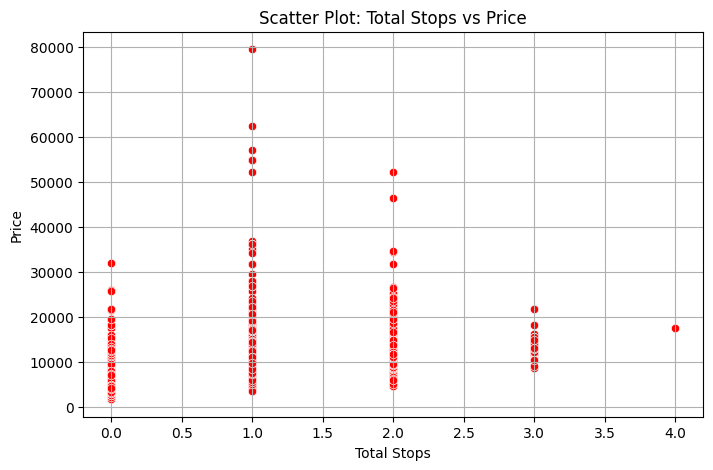

In [60]:
# Scatter Plot: Total_Stops vs Price (or another numeric column)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Total_Stops'], y=data['Price'],color='red')
# Replace 'Price' with the target variable
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.title("Scatter Plot: Total Stops vs Price")
plt.grid(True)
plt.show()

# Box Plot: Total Stops vs Price

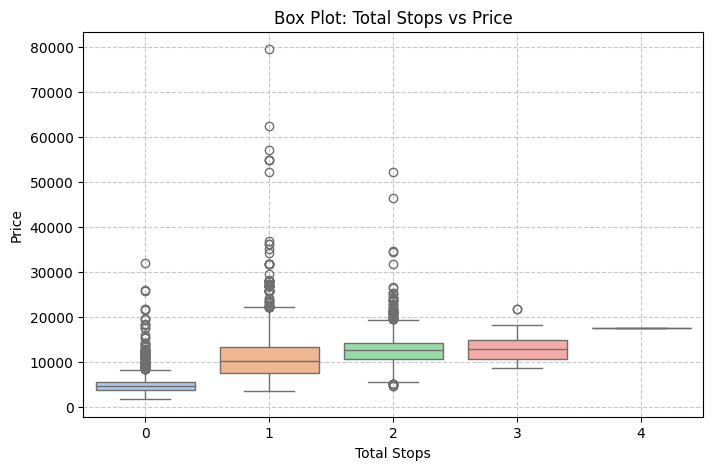

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot: Total Stops vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Total_Stops', y='Price', hue='Total_Stops', palette='pastel', legend=False)
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.title("Box Plot: Total Stops vs Price")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Line Plot: Price Trend Over Months (Seasonality Analysis)

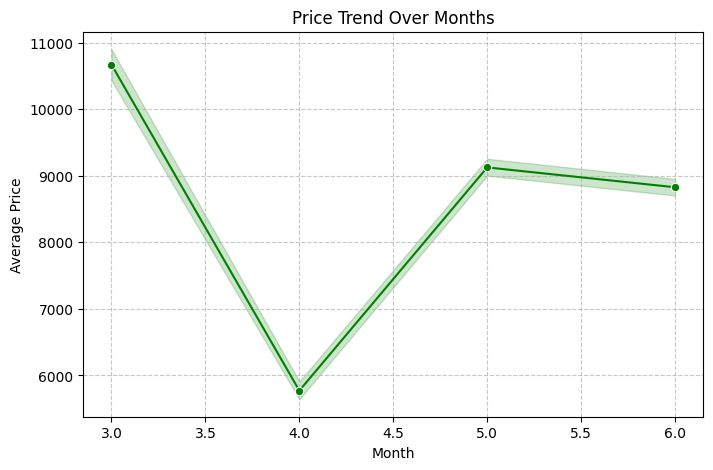

In [64]:
# Line Plot: Price vs Month
plt.figure(figsize=(8, 5))
sns.lineplot(x=data['Month'], y=data['Price'], marker='o', color='green')
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Price Trend Over Months")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
